# Frecuencia de palabras en textos

Leyes de escala - Clase #2
Laboratorio de Fisica 1 - 1er cuat 2023

----

Importamos los modulos interesantes

In [1]:
import string
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Definimos una funcion para separar el texto de todo el resto

In [2]:
def _limpiar_texto_de_gutenberg(text):
    """
    Encontrar demarcaciones en un texto proveniente
    del Proyecto Gutenberg y seleccionar el texto entre marcas.
    """
    start_fence = "start of this project gutenberg ebook"
    end_fence = "end of this project gutenberg ebook"
    text = text.lower()
    start_pos = text.find(start_fence) + len(start_fence) + 1
    end_pos = text.find(end_fence)

    # Chequeamos que las marcas esten razonablemente ubicadas.
    assert 0.000001 < start_pos / len(text) <= 0.1
    assert 0.9 < end_pos / len(text) <= 1.0

    return text[start_pos:end_pos]

Definimos una funcion para contar palabras

In [3]:
def contar_palabras(f, clean_text=False):
    """
    Cuenta palabras en un archivo de texto.

    Arguments:
        f: an open file handle
        clean_text (optional): a Boolean, if true, filters out boilerplate
            typical of a Gutenberg book.

    Returns:
        A dict keyed by word, with word counts
    """
    text = f.read()
    if clean_text:
        text = _limpiar_texto_de_gutenberg(text)

    chunks = text.split()
    npunc = [word.strip(string.punctuation) for word in chunks]
    word_list = [word.lower() for word in npunc if word]
    word_counts = collections.Counter(word_list)
    return dict(word_counts)

Ejemplo de lo que hace la funcion (parcialmente)

In [4]:
archivo_del_libro = 'pg61851.txt'

In [5]:
with open(archivo_del_libro, "r") as f:
    word_counts = contar_palabras(f, True)

In [6]:
word_counts

{'el': 3489,
 'crimen': 61,
 'y': 4106,
 'castigo': 11,
 'produced': 2,
 'by': 3,
 'carlos': 4,
 'colón': 1,
 'the': 4,
 'university': 1,
 'of': 2,
 'toronto': 1,
 'internet': 1,
 'archive': 1,
 'and': 1,
 'online': 1,
 'distributed': 1,
 'proofreading': 1,
 'team': 1,
 'at': 1,
 'https://www.pgdp.net': 1,
 'this': 1,
 'book': 1,
 'was': 2,
 'from': 1,
 'images': 1,
 'made': 1,
 'available': 1,
 'hathitrust': 1,
 'digital': 1,
 'library': 1,
 'nota': 5,
 'del': 812,
 'transcriptor': 1,
 'se': 3023,
 'ha': 779,
 'respetado': 1,
 'la': 5330,
 'ortografía': 2,
 'acentuación': 1,
 'original': 14,
 'errores': 5,
 'obvios': 1,
 'de': 8301,
 'imprenta': 1,
 'han': 114,
 'sido': 175,
 'corregidos': 1,
 'páginas': 2,
 'en': 4198,
 'blanco': 16,
 'eliminadas': 2,
 'letras': 9,
 'itálicas': 1,
 'son': 141,
 'denotadas': 1,
 'con': 1802,
 'líneas': 8,
 'las': 966,
 'versalitas': 1,
 'mayúsculas': 2,
 'tamaño': 3,
 'igual': 7,
 'a': 4876,
 'minúsculas': 1,
 'sustituidas': 1,
 'por': 1578,
 'normal'

----

Contamos palabras y las ordenamos por frecuencia

In [7]:
with open(archivo_del_libro, "r") as f:
    word_counts = contar_palabras(f, True)
    df = pd.DataFrame(
            [
                {"palabra": x, "frecuencia": y}
                for x, y in zip(word_counts.keys(), word_counts.values())
            ]
        )
    df = df.sort_values("frecuencia", ascending=False)

Resultado de contar y ordenar por frecuencia

In [8]:
df

,palabra,frecuencia
43,de,8301
101,que,5617
37,la,5330
63,a,4876
49,en,4198
...,...,...
9223,enseñando,1
9225,dad,1
9226,gracias--murmuraba,1
9230,charlando,1


Graficamos la ocurrencia (frecuencia) vs el rango de cada palabra

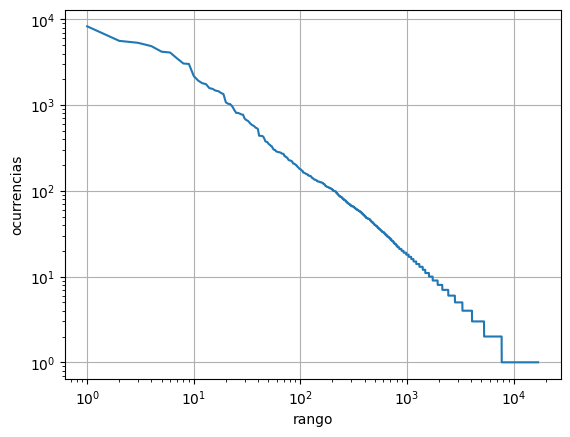

In [9]:
plt.figure()
rank = np.arange(df.shape[0]) + 1
plt.loglog(rank, df.frecuencia)
plt.xlabel('rango')
plt.ylabel('ocurrencias')
plt.grid(True)
plt.show()